In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#modelling & consulting
import statsmodels
import seaborn as sns
import sqlite3

In [15]:
def consulting_db(query):
    print(query)
    conn = sqlite3.connect('../queries/retail.db')
    df = pd.read_sql_query(f'{query}', conn)
    conn.close()
    return df

df_world = consulting_db("SELECT * FROM country_consumption")
df_world['ARPU'] = df_world['ARPU'].astype(float)

df_world.dtypes
df_world.head()

SELECT * FROM country_consumption


,Country,total_items,unique_items,avg_price_unit,total_revenue,ARPU
0,United Kingdom,246630,3657,2.96,6811580.41,27.62
1,Netherlands,1149,783,2.76,283273.14,246.54
2,EIRE,3100,1949,3.40,251406.40,81.10
3,Germany,6600,1669,2.69,200808.40,30.43
4,France,5711,1521,2.70,181658.33,31.81


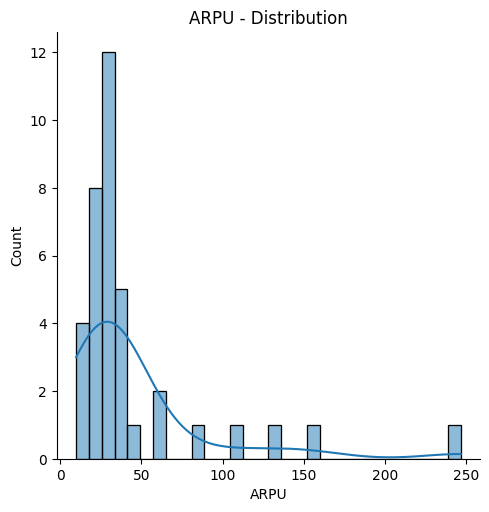

In [16]:
sns.displot(data=df_world, x="ARPU", kde=True, bins=30)
plt.title('ARPU - Distribution')
plt.show()

In [17]:
#first simple visualization of the dataset with metric ARPU (scope of the world)
# --ARPU (Average Revenue Per Customer) Receita média por cliente.

fig = go.Figure(data=go.Choropleth(
    locations = df_world['Country'],
    locationmode = 'country names',
    z = df_world['ARPU'],
    colorscale = 'reds',
    colorbar_title = 'ARPU in the World',
    text = df_world['avg_price_unit'],
    hovertemplate='<br>%{location}</br><br>ARPU: %{z}<br>Price Unit: %{text}<extra></extra>'

))

fig.update_geos(
    projection_type="orthographic",
    showocean=False,
    oceancolor="lightblue",
    showland=True,
    landcolor="rgb(230, 230, 230)"
)

fig.show()